# Analysis on World Happiness Report

- we are going to conduct very Exciting Data Analysis on The World Happiness Dataset, also going to Build Model (Neural Network/ Multi layer Perceptron) for predicting Happiness Score of country
- Exicting Thing is we are going to use R language for this
- Let's start 

### Importing Libraries

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(neuralnet)


list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




[1] "world-happiness"

### Load Dataset

In [2]:
happy <- read.csv(file = '../input/world-happiness/2019.csv', header=T)
head(happy)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


# EDA


- All Variables are continuous, we will be using Histograms for ploting  

#### Happiness Score

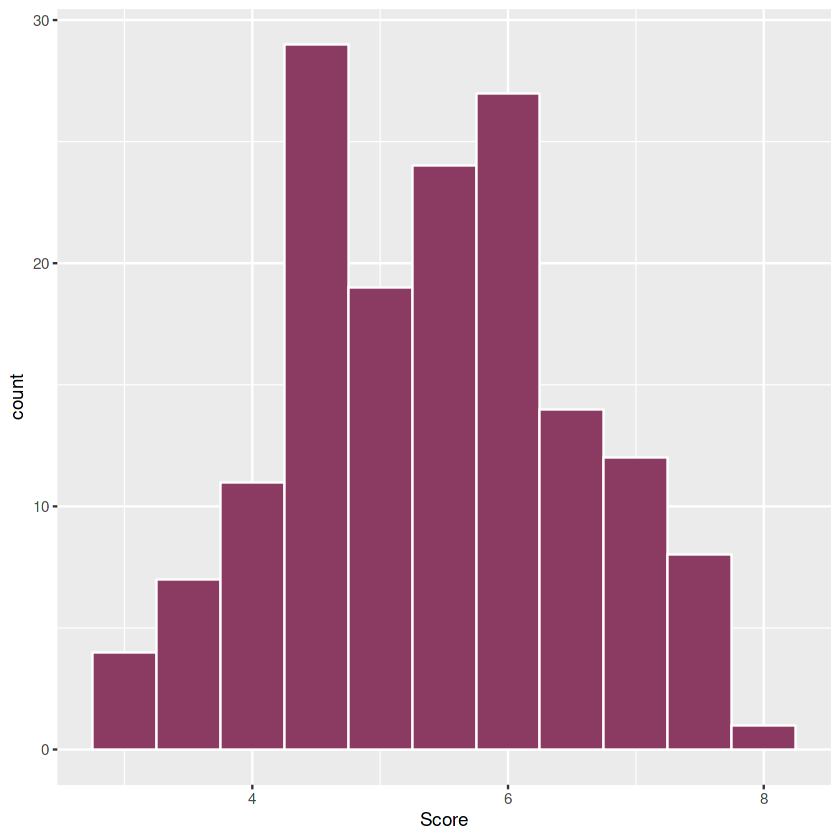

In [3]:
ggplot(data=happy, aes(Score))+
  geom_histogram(binwidth=0.5, fill="hotpink4", colour="white" )

#### GDP

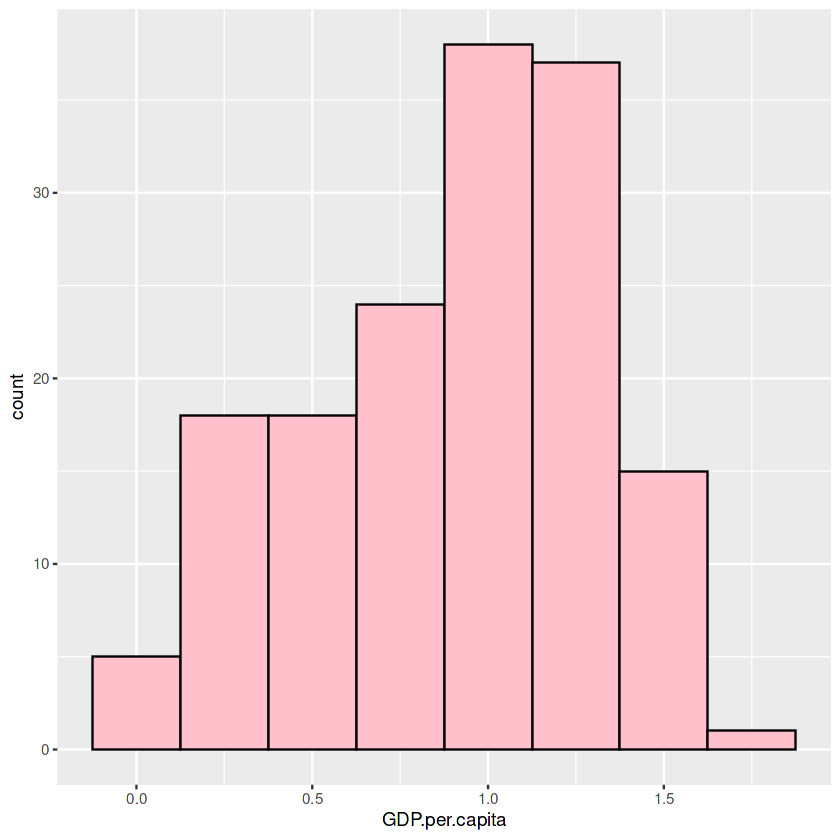

In [4]:
ggplot(data=happy, aes(GDP.per.capita))+
  geom_histogram(binwidth=0.25, fill="pink", colour="black")

#### GDP & Happiness Score

The question here is: are richer countries happier or sadder than poorer countries?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


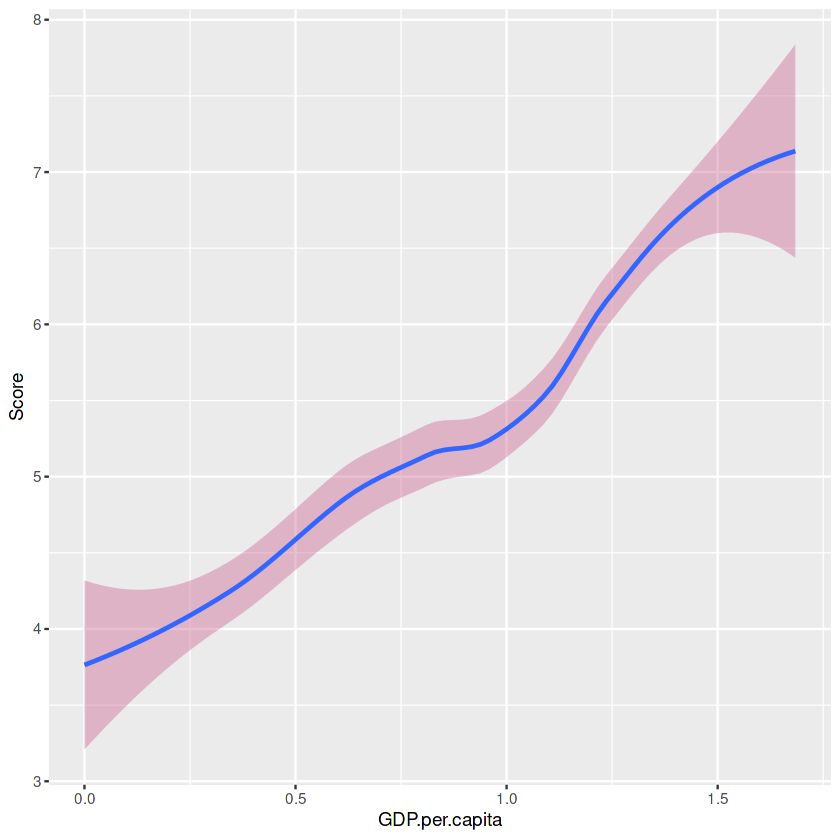

In [5]:
ggplot(data=happy)+
  geom_smooth(aes(GDP.per.capita, Score), fill="hotpink3")

#### GDP & Corruption

My assumption was that poorer countries were more corrupt, but this plot shows that I was wrong:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


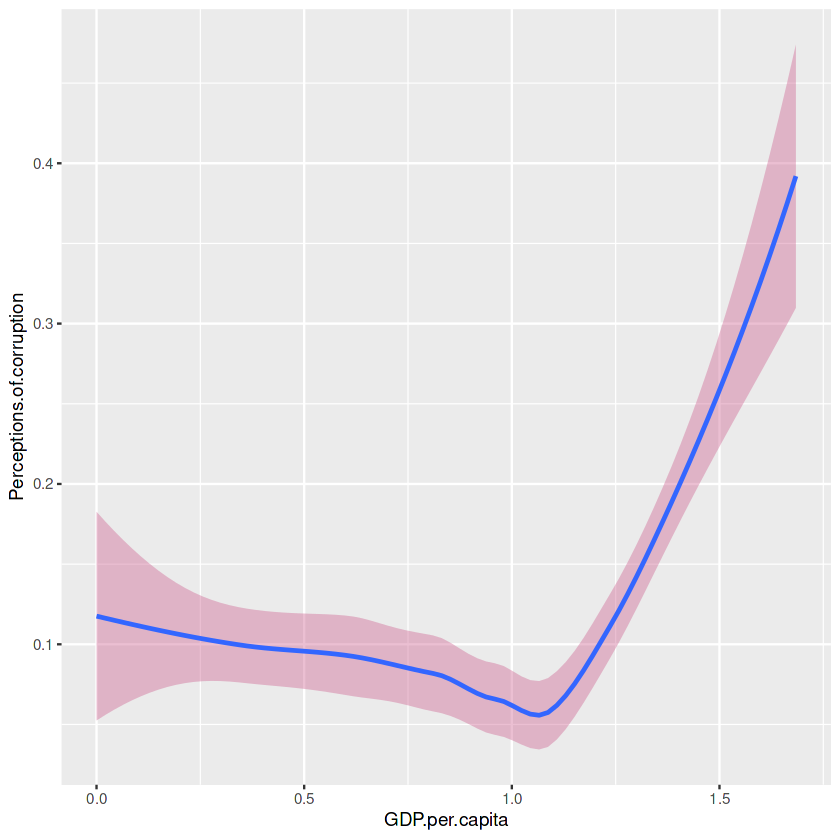

In [6]:
ggplot(data=happy)+
  geom_smooth(aes(GDP.per.capita, Perceptions.of.corruption), fill="hotpink3")

Next, let's take a look at the top 10 and bottom 10 countries and how they compare in terms of happiness score.

In [7]:
tb <- happy %>% filter(Overall.rank > 145 | Overall.rank < 11) %>% arrange(Overall.rank)
tb

Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


Let's plot this relationship.

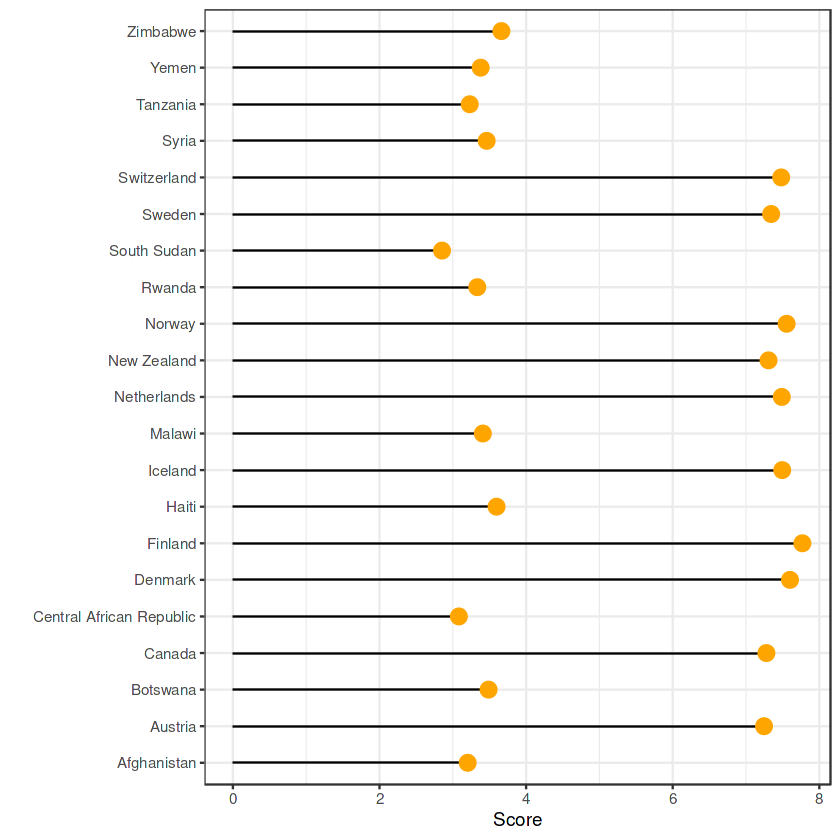

In [8]:
tb %>%
  arrange(Score) %>%  
  mutate(name=factor(Country.or.region, levels=Country.or.region)) %>%   
  ggplot( aes(x=Country.or.region, y=Score)) +
  geom_segment( aes(xend=Country.or.region, yend=0)) +
  geom_point( size=4, color="orange") +
  coord_flip() +
  theme_bw() +
  xlab("")

You can create similar plots using this code for all the other variables to observe their distribution.

I am now going to move onto Neural Networks!

# ANN

## 1 Hidden layer with 2 Nodes

In [9]:
ann2 <- neuralnet(Score~GDP.per.capita+Social.support+Healthy.life.expectancy+
                 Freedom.to.make.life.choices+Generosity+Perceptions.of.corruption,
                 data=happy, hidden=c(2), act.fct = "logistic")

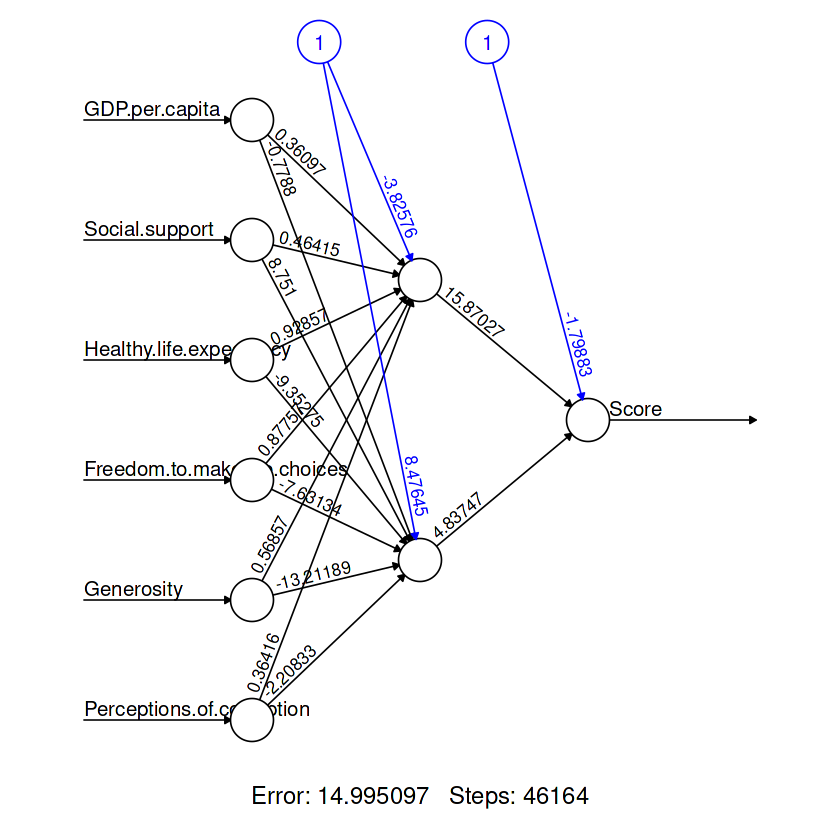

In [10]:
plot(ann2, rep="best")

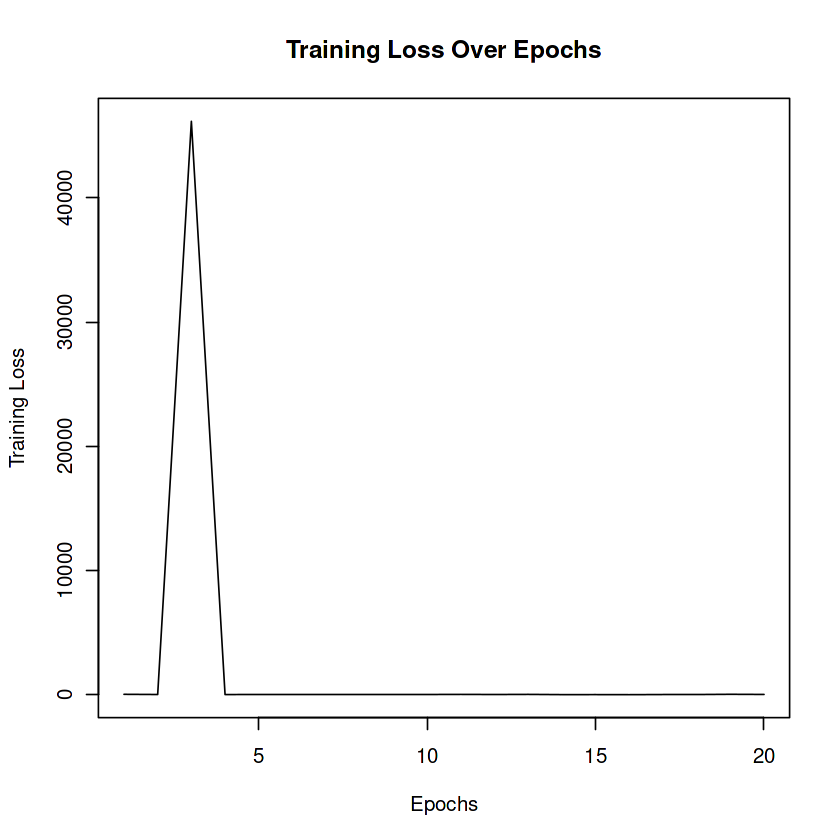

In [11]:
training_results <- ann2$result.matrix

training_loss <- training_results[, 1]

plot(training_loss, type = "l", xlab = "Epochs", ylab = "Training Loss", main = "Training Loss Over Epochs")

Since the output was a continuous value, I had to convert this to a classification problem by specifying that if a given Score value was greater than the mean it would be = 1; if not, = 0.

In [12]:
#predict

Score <- happy$Score

happy2 <- select(happy, GDP.per.capita,Social.support,Healthy.life.expectancy,
                   Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption)

output <- compute(ann2, happy2)
p1 <- output$net.result
pred1 <- ifelse(p1>5.4, 1, 0)
Score <- ifelse(Score>5.4, 1, 0)

tab2 <- table(pred1, Score)
tab2

sum(diag(tab2))/sum(tab2)

     Score
pred1  0  1
    0 68  5
    1 11 72

[1] 0.8974359

## 1st Hiden layer with 1 node & 2nd Hidden layer with 2 Nodes

In [13]:
ann12 <- neuralnet(Score~GDP.per.capita+Social.support+Healthy.life.expectancy+
                 Freedom.to.make.life.choices+Generosity+Perceptions.of.corruption,
                 data=happy, hidden=c(1,2), act.fct = "logistic")

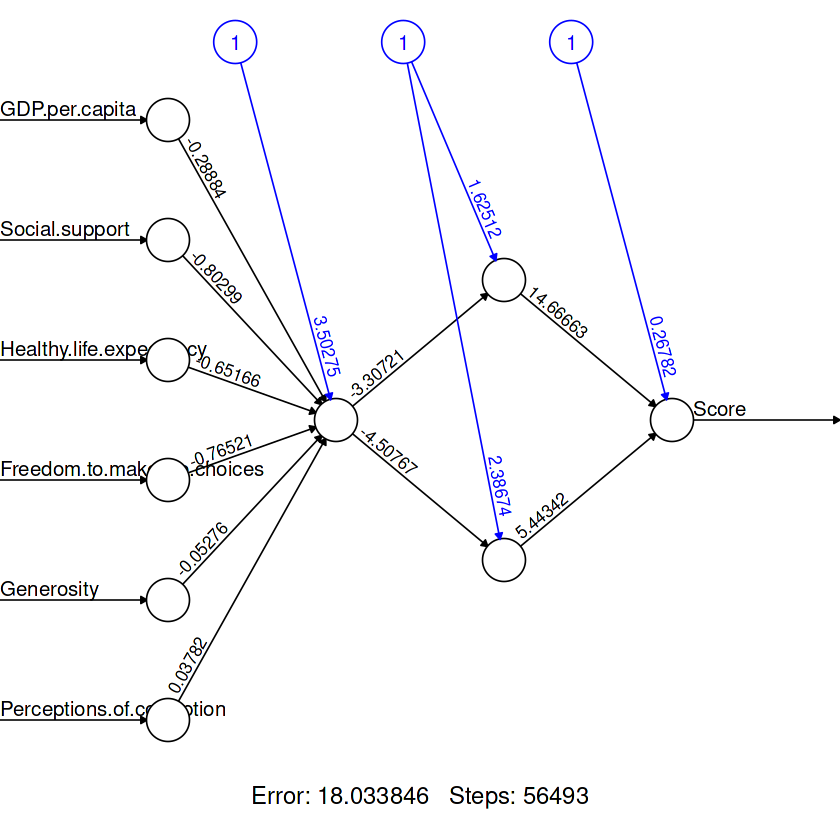

In [14]:
plot(ann12, rep="best")

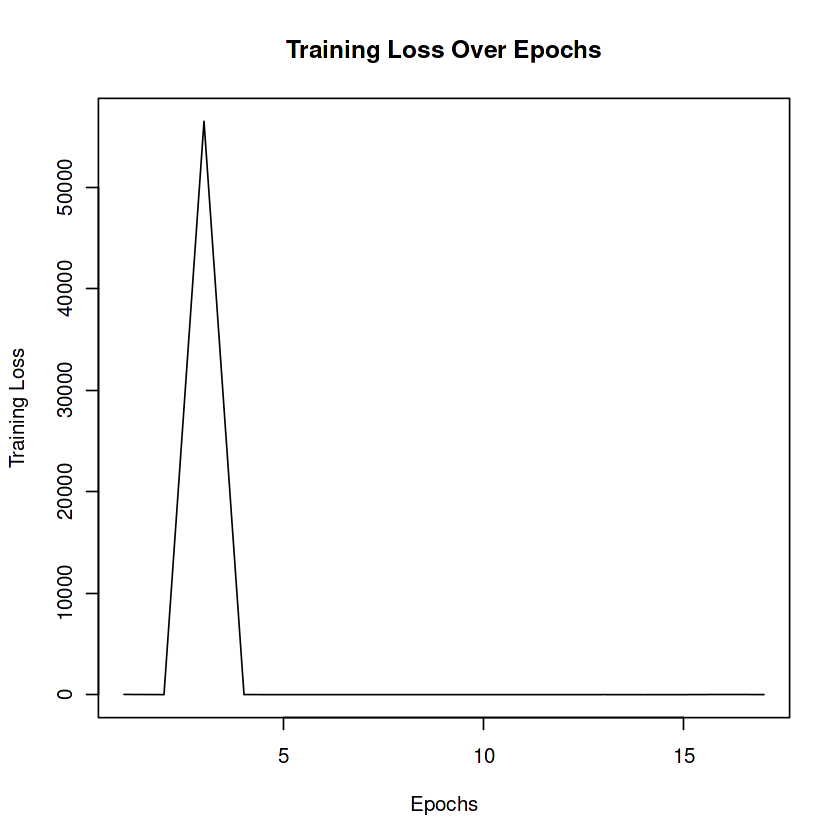

In [15]:
training_results <- ann12$result.matrix

training_loss <- training_results[, 1]

plot(training_loss, type = "l", xlab = "Epochs", ylab = "Training Loss", main = "Training Loss Over Epochs")

In [16]:
#predict

Score <- happy$Score

happy2 <- select(happy, GDP.per.capita,Social.support,Healthy.life.expectancy,
                   Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption)

output <- compute(ann12, happy2)
p1 <- output$net.result
pred1 <- ifelse(p1>5.4, 1, 0)
Score <- ifelse(Score>5.4, 1, 0)

tab12 <- table(pred1, Score)
tab12

sum(diag(tab12))/sum(tab12)

     Score
pred1  0  1
    0 69  7
    1 10 70

[1] 0.8910256

## 2 Hidden layer & 2 Nodes each 

In [17]:
ann22 <- neuralnet(Score~GDP.per.capita+Social.support+Healthy.life.expectancy+
                 Freedom.to.make.life.choices+Generosity+Perceptions.of.corruption,
                 data=happy, hidden=c(2,2), act.fct = "logistic")

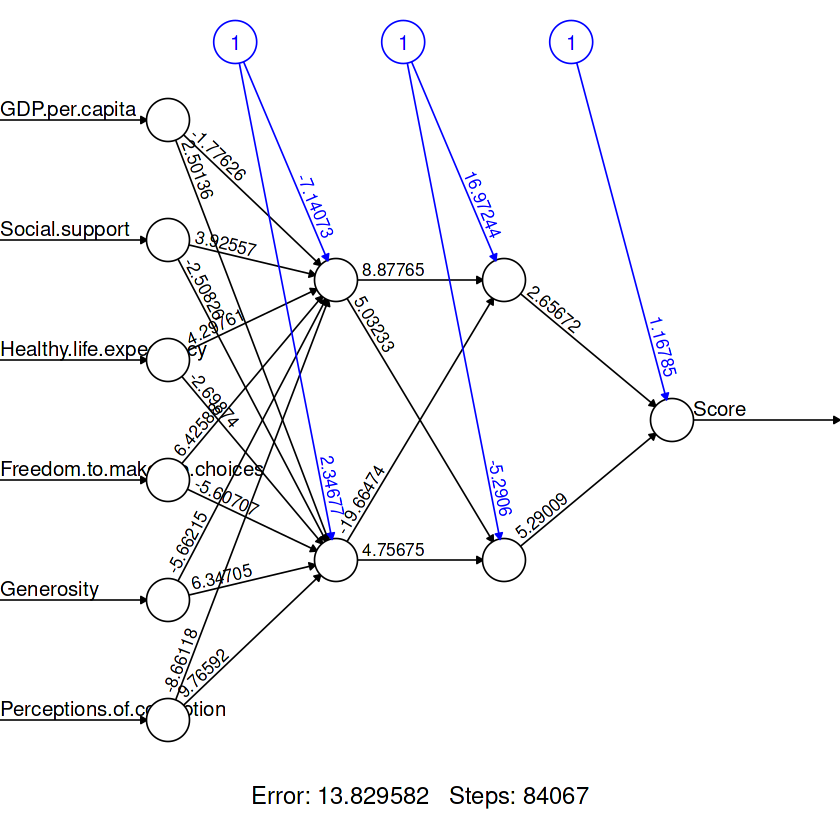

In [18]:
plot(ann22, rep="best")

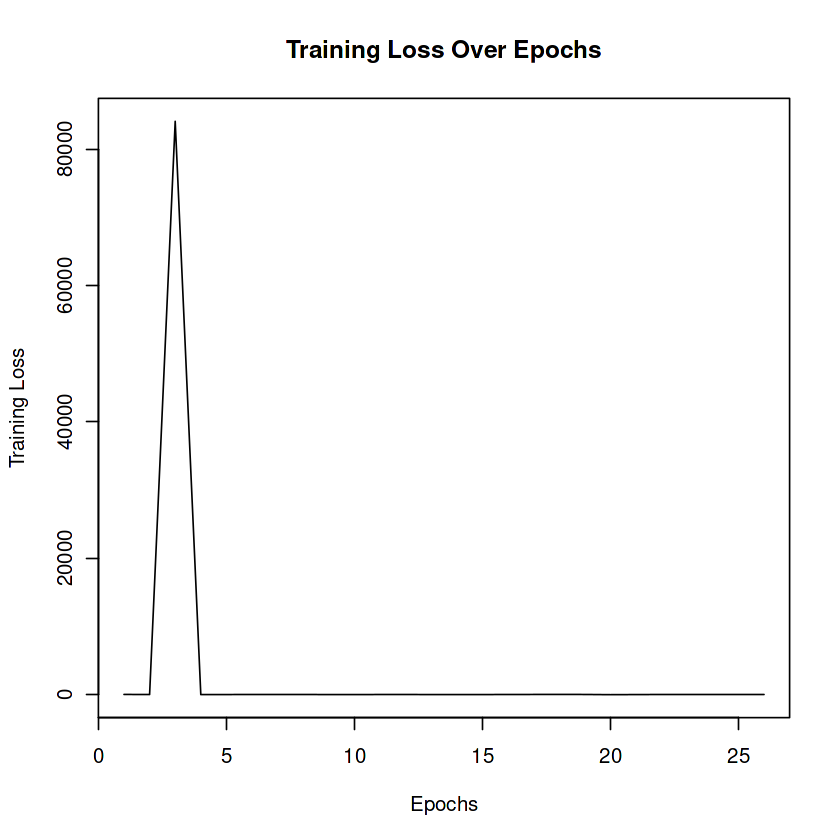

In [19]:
training_results <- ann22$result.matrix

training_loss <- training_results[, 1]

plot(training_loss, type = "l", xlab = "Epochs", ylab = "Training Loss", main = "Training Loss Over Epochs")

Next, I am going to use this ANN model to predict on the data.

In [20]:
#predict

Score <- happy$Score

happy2 <- select(happy, GDP.per.capita,Social.support,Healthy.life.expectancy,
                   Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption)

output <- compute(ann22, happy2)
p1 <- output$net.result
pred1 <- ifelse(p1>5.4, 1, 0)
Score <- ifelse(Score>5.4, 1, 0)

tab22 <- table(pred1, Score)
tab22

sum(diag(tab22))/sum(tab22)

     Score
pred1  0  1
    0 69  4
    1 10 73

[1] 0.9102564

## 3 Hidden layer with respectively 3, 3, 2 Nodes

In [21]:
ann332 <- neuralnet(Score~GDP.per.capita+Social.support+Healthy.life.expectancy+
                 Freedom.to.make.life.choices+Generosity+Perceptions.of.corruption,
                 data=happy, hidden=c(3, 3, 2), act.fct = "logistic")

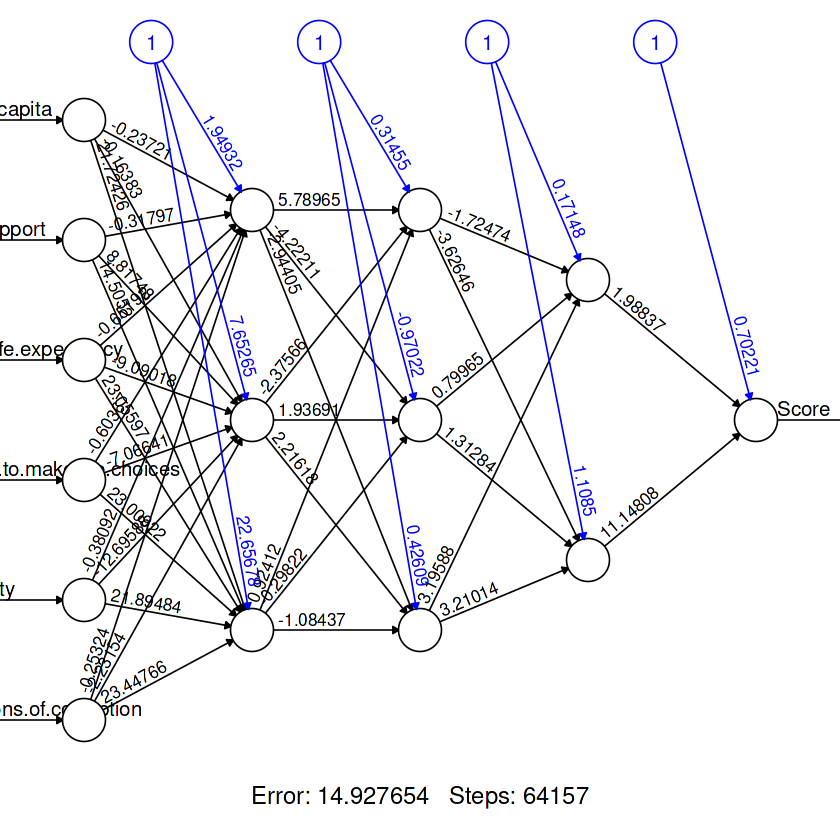

In [22]:
plot(ann332, rep="best")

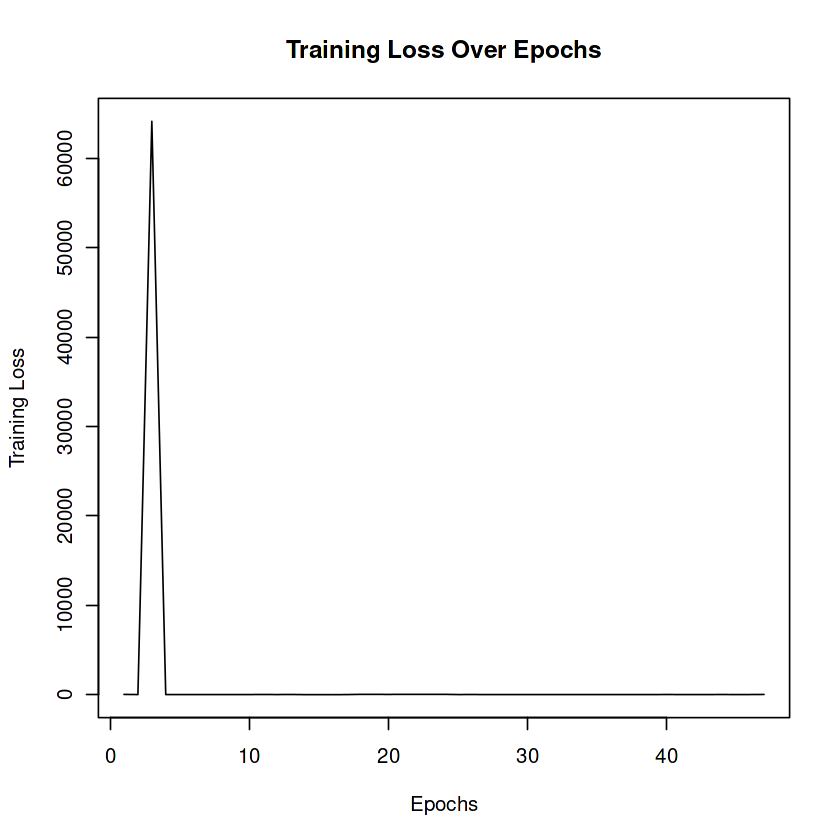

In [23]:
training_results <- ann332$result.matrix

training_loss <- training_results[, 1]

plot(training_loss, type = "l", xlab = "Epochs", ylab = "Training Loss", main = "Training Loss Over Epochs")

In [24]:
#predict

Score <- happy$Score

happy2 <- select(happy, GDP.per.capita,Social.support,Healthy.life.expectancy,
                   Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption)

output <- compute(ann332, happy2)
p1 <- output$net.result
pred1 <- ifelse(p1>5.4, 1, 0)
Score <- ifelse(Score>5.4, 1, 0)

tab332 <- table(pred1, Score)
tab332

sum(diag(tab332))/sum(tab332)

     Score
pred1  0  1
    0 68  6
    1 11 71

[1] 0.8910256

## 2 Hidden layer with 3 & 4 Nodes respectively 

In [25]:
ann34 <- neuralnet(Score~GDP.per.capita+Social.support+Healthy.life.expectancy+
                 Freedom.to.make.life.choices+Generosity+Perceptions.of.corruption,
                 data=happy, hidden=c(3, 4), act.fct = "logistic")

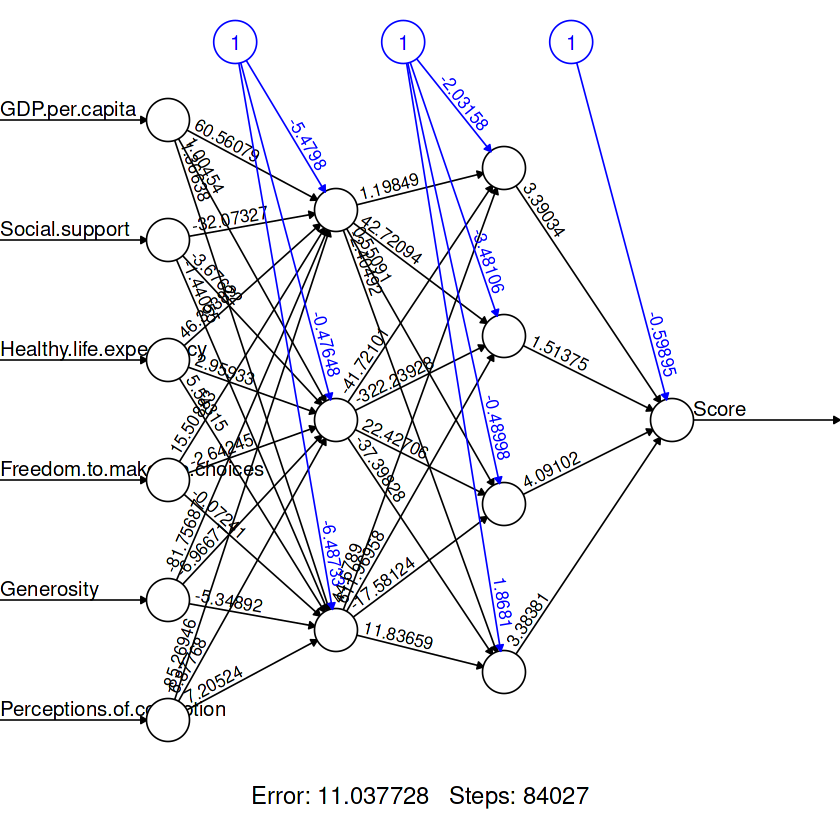

In [26]:
plot(ann34, rep="best")

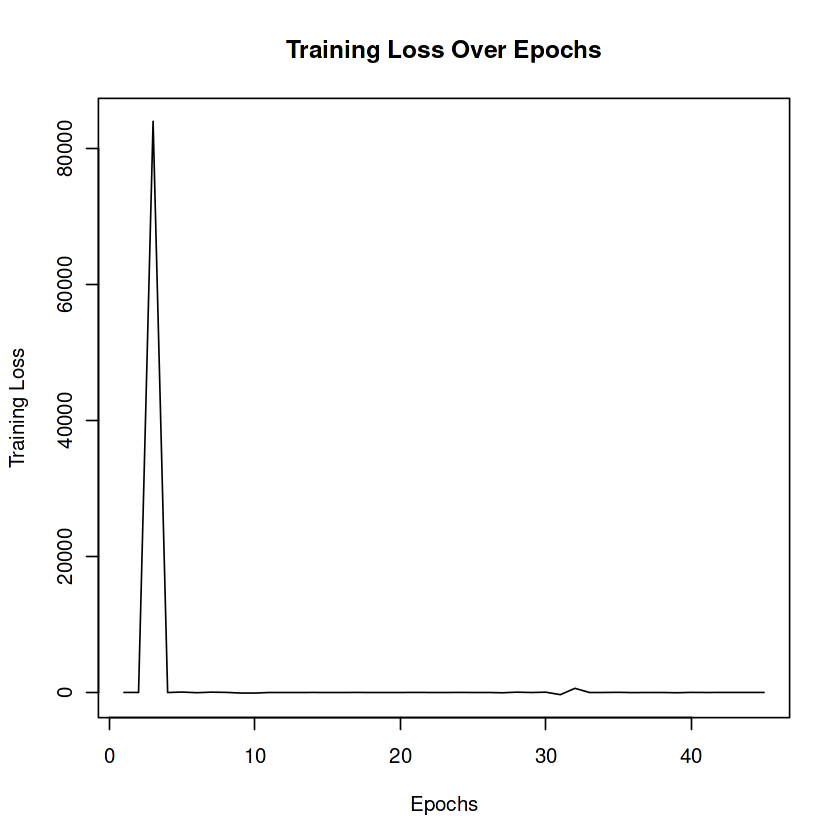

In [27]:
training_results <- ann34$result.matrix

training_loss <- training_results[, 1]

plot(training_loss, type = "l", xlab = "Epochs", ylab = "Training Loss", main = "Training Loss Over Epochs")

In [28]:
#predict

Score <- happy$Score

happy2 <- select(happy, GDP.per.capita,Social.support,Healthy.life.expectancy,
                   Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption)

output <- compute(ann34, happy2)
p1 <- output$net.result
pred1 <- ifelse(p1>5.4, 1, 0)
Score <- ifelse(Score>5.4, 1, 0)

tab34 <- table(pred1, Score)
tab34

sum(diag(tab34))/sum(tab34)

     Score
pred1  0  1
    0 71  8
    1  8 69

[1] 0.8974359

# Summary

### Layers & Nodes      ||  Accuracy
---------------------------------
- Hidden = c(2)     ------>  0.897
- Hidden = c(1,2)   ---->  0.891
- Hidden = c(2,2)   ---->  0.910
- Hideen = c(3,4)   ---->  0.904
- Hidden = c(3,3,2) --->  0.891